# Uni: zc2780, dz2557, lw3175
# Zixuan Chen, Dongyun Zheng, Lan Wang
# Link to your Public Github repository with Final report  : Fill here


### Submission Due Date: 03/07/2025

# World Happiness Classification Competition
Goals :
- Understand how the models function
- Understand what the parameters control
- Learn from the model experimentation process
- Make a good looking notebook report
- Upload as a personal project on Github

**Overall Steps:**
1. Load datasets and merge them.
2. Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit predictions



## 0. Loading Datasets

Loading the World Happiness 2023 datasets

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset

from google.colab import files
uploaded = files.upload()

whr_df = pd.read_csv('WHR_2023.csv')
# Inspect the first few rows to understand the structure
whr_df

Saving WHR_2023.csv to WHR_2023.csv


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [ ]:
# Convert the regression target ('happiness_score') into classification labels
# We'll use quartiles to create 4 happiness categories: Very Low, Low, High, Very High

# Define quartiles
whr_df['happiness_category'] = pd.qcut(whr_df['happiness_score'],
                                       q=5,
                                       labels=['Very Low', 'Low','Average', 'High', 'Very High'])

# Select features and target
X = whr_df.drop(columns=['happiness_score', 'happiness_category'])
y = whr_df['happiness_category']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Convert y_train and y_test to numerical labels
y_train_labels = y_train.astype('category').cat.codes
y_test_labels = y_test.astype('category').cat.codes
## Complete in a similar manner as above



Write in the next cell what the y_train.astype('category').cat.codes line does. What is the difference between y_train_labels and y_train?

In [ ]:
# Your answer:

#
# y_train contains the original category namThe line y_train.astype('category').cat.codes converts categorical labels into numerical labels.es as strings.(eg. high, low, medium)
# y_train_labels contains the corresponding integer representations, which can be used for model training.(eg. 0,1,2...)

**Answer:**


1.   The line `y_train.astype('category')`.cat.codes converts categorical labels into numerical labels.
2.   `y_train` contains the original category names as strings.(eg. high, low, medium)
3. `y_train_labels` contains the corresponding integer representations, which can be used for model training.(eg. 0,1,2...)






<h3> Add new data

In [ ]:
# Truncated and cleaned up region data to merge
from google.colab import files
uploaded = files.upload()
countrydata=pd.read_csv("newcountryvars.csv")

countrydata.head()

Saving newcountryvars.csv to newcountryvars.csv


,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,India,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799
1,Nigeria,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264
2,Mexico,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680
3,Pakistan,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074
4,Bangladesh,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722


In [ ]:
# Extracti country exists in newcountryvars.csv
common_countries = countrydata['country_name']

common_countries

,country_name
0,India
1,Nigeria
2,Mexico
3,Pakistan
4,Bangladesh
...,...
169,Somalia
170,Central African Republic
171,Samoa
172,Palestine


In [ ]:
# Find magic index (get index that do not need to be eliminated)
training_bool_index = X_train['country'].isin(common_countries)
testing_bool_idnex = X_test['country'].isin(common_countries)

In [ ]:
X_train_deleted = X_train[training_bool_index]
X_test_deleted = X_test[testing_bool_idnex]

X_train_deleted.shape, X_test_deleted.shape

((89, 8), (39, 8))

In [ ]:
#Ensure that x and y have the same number of rows
y_train_labels_deleted = y_train_labels[training_bool_index]
y_test_labels_deleted = y_test_labels[testing_bool_idnex]

y_train_labels_deleted.shape, y_test_labels_deleted.shape

((89,), (39,))

In [ ]:
X_train[X_train['country'].isin(common_countries)]

,country,region,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
126,Madagascar,Sub-Saharan Africa,0.632,0.779,0.178,0.187,0.177,0.134
102,Mauritania,Sub-Saharan Africa,1.099,0.764,0.244,0.320,0.130,0.195
60,Mongolia,East Asia,1.379,1.494,0.244,0.425,0.239,0.058
79,Tajikistan,Commonwealth of Independent States,0.972,1.248,0.291,0.599,0.104,0.292
91,Ukraine,Central and Eastern Europe,1.358,1.354,0.355,0.551,0.265,0.016
...,...,...,...,...,...,...,...,...
56,South Korea,East Asia,1.853,1.188,0.603,0.446,0.112,0.163
123,Ethiopia,Sub-Saharan Africa,0.793,1.114,0.250,0.451,0.283,0.101
63,China,East Asia,1.510,1.249,0.468,0.666,0.115,0.145
74,Peru,Latin America and Caribbean,1.390,1.153,0.499,0.549,0.073,0.027


In [ ]:
y_train = y_train_labels_deleted
y_test = y_test_labels_deleted

In [ ]:
# Merge in new data to X_train and X_test by taking "country" from first table and "country_name" from 2nd table.
# Also check which countries are common in both the datasets, and which type of merge will you perform for the best results.
# Hint: Look on the 'how' parameter of megre function of pandas.

# Merge in new data by country
X_train_merged = X_train_deleted.merge(countrydata, left_on='country', right_on='country_name', how='inner')
X_test_merged = X_test_deleted.merge(countrydata, left_on='country', right_on='country_name', how='inner')

# Check common countries in both datasets
common_countries = set(X_train_merged['country']).intersection(set(countrydata['country_name']))
print(f"Number of common countries: {len(common_countries)}")



## Complete code
## Complete code
# X_train[['country', 'country_name']].sample(10)



Number of common countries: 89


In [ ]:
X_train_merged.shape

(89, 16)

In [ ]:
X_train = X_train_merged
X_test = X_test_merged

In [ ]:
print(X_train.shape)  # Should print (89, N) where N is the number of features
print(y_train.shape)  # Should print (89,)

(89, 16)
(89,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(39, 16)
(39,)


In [ ]:
X_train_merged.head()

,country,region,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,Madagascar,Sub-Saharan Africa,0.632,0.779,0.178,0.187,0.177,0.134,Madagascar,25570895,70.7,0.512149,65.515,10.34614,6.145955,1319.699397
1,Mauritania,Sub-Saharan Africa,1.099,0.764,0.244,0.320,0.130,0.195,Mauritania,4420184,31.0,0.513106,63.239,8.46379,4.266000,3527.264154
2,Mongolia,East Asia,1.379,1.494,0.244,0.425,0.239,0.058,Mongolia,3075647,21.6,0.734832,69.806,14.84552,9.750000,10449.207270
3,Tajikistan,Commonwealth of Independent States,0.972,1.248,0.291,0.599,0.104,0.292,Tajikistan,8921343,31.5,0.627472,69.582,11.26186,10.355820,2600.585607
4,Ukraine,Central and Eastern Europe,1.358,1.354,0.355,0.551,0.265,0.016,Ukraine,44222947,24.1,0.743049,71.129,15.30672,11.340000,7361.011228


In [ ]:
X_train.head(1)

,country,region,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,Madagascar,Sub-Saharan Africa,0.632,0.779,0.178,0.187,0.177,0.134,Madagascar,25570895,70.7,0.512149,65.515,10.34614,6.145955,1319.699397


## 1.  EDA

In [ ]:
print(X_train.dtypes)

country                           object
region                            object
gdp_per_capita                   float64
social_support                   float64
healthy_life_expectancy          float64
freedom_to_make_life_choices     float64
generosity                       float64
perceptions_of_corruption        float64
country_name                      object
population                         int64
population_below_poverty_line    float64
hdi                              float64
life_expectancy                  float64
expected_years_of_schooling      float64
mean_years_of_schooling          float64
gni                              float64
dtype: object


Describe what you see above?

**Answer:**
1. The dataset consists mostly of numerical features in **float64** and **int64** formats, while categorical variables such as country, region, and `country_name` are stored as **object** types.
2. There may have multiple duplicated columns with suffixes `_x` and `_y`, such as `country_name_x`, `country_name_y`, `population_x`, `population_y`, `hdi_x`, and `hdi_y`, indicating that the dataset was merged from multiple sources and contains redundant information.

Find out the number and percentage of missing values in the table per column

In [ ]:
# Your code here:
missing_values = X_train.isnull().sum()
missing_percentage = (X_train.isnull().mean()) * 100

# Combine into a DataFrame for better visualization
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Display only columns with missing values
missing_data = missing_data[missing_data['Missing Values'] > 0]

# Print results
print(missing_data)

                               Missing Values  Percentage
population_below_poverty_line              10   11.235955
life_expectancy                             1    1.123596
expected_years_of_schooling                 1    1.123596
mean_years_of_schooling                     1    1.123596
gni                                         1    1.123596


Plot the frequency distribution / histogram of some of the numerical features that you think are important

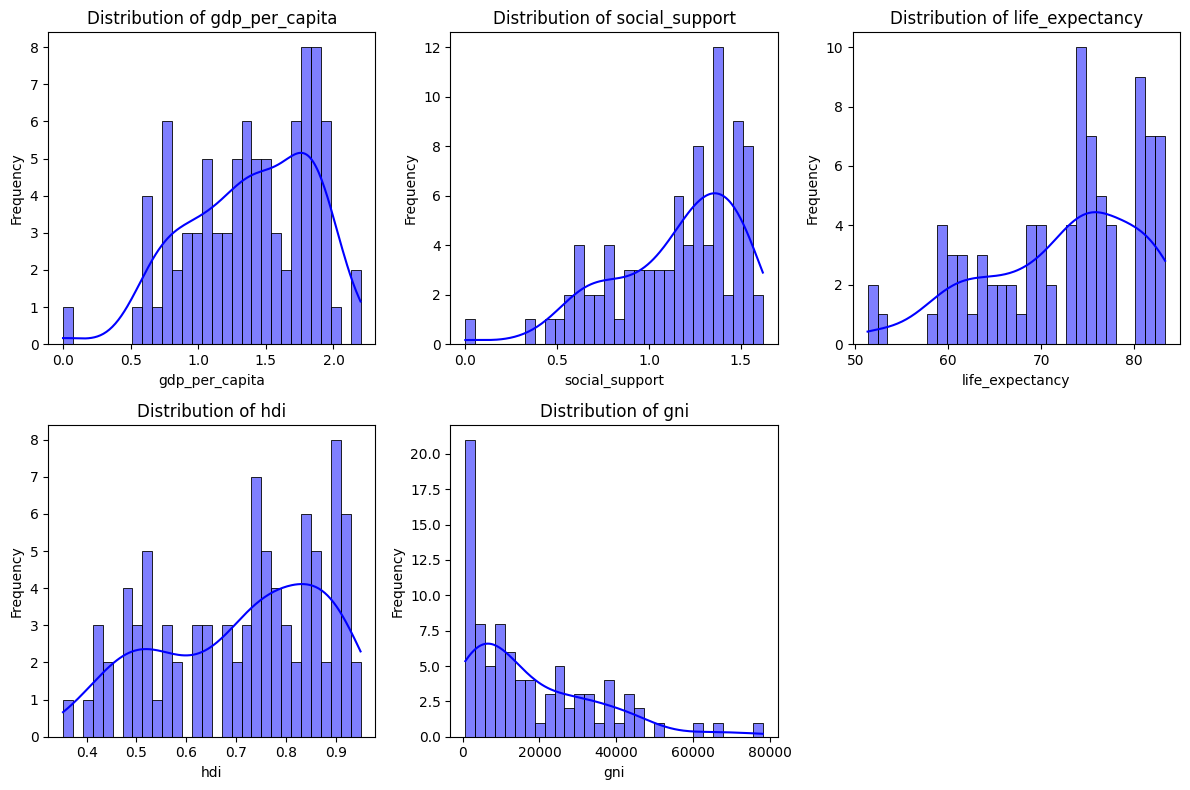

In [ ]:
# Your plotting code here:
import matplotlib.pyplot as plt
import seaborn as sns

# Select some important numerical features
important_features = ['gdp_per_capita', 'social_support', 'life_expectancy', 'hdi', 'gni']

# Plot histograms
plt.figure(figsize=(12, 8))
for i, feature in enumerate(important_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(X_train[feature].dropna(), bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Plot the categorical variables and their distribution

In [ ]:
# Your plotting code here:
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()
print("Categorical Variables:", categorical_columns)

Categorical Variables: ['country', 'region', 'country_name']


<ipython-input-23-2710a0e18593>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
<ipython-input-23-2710a0e18593>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


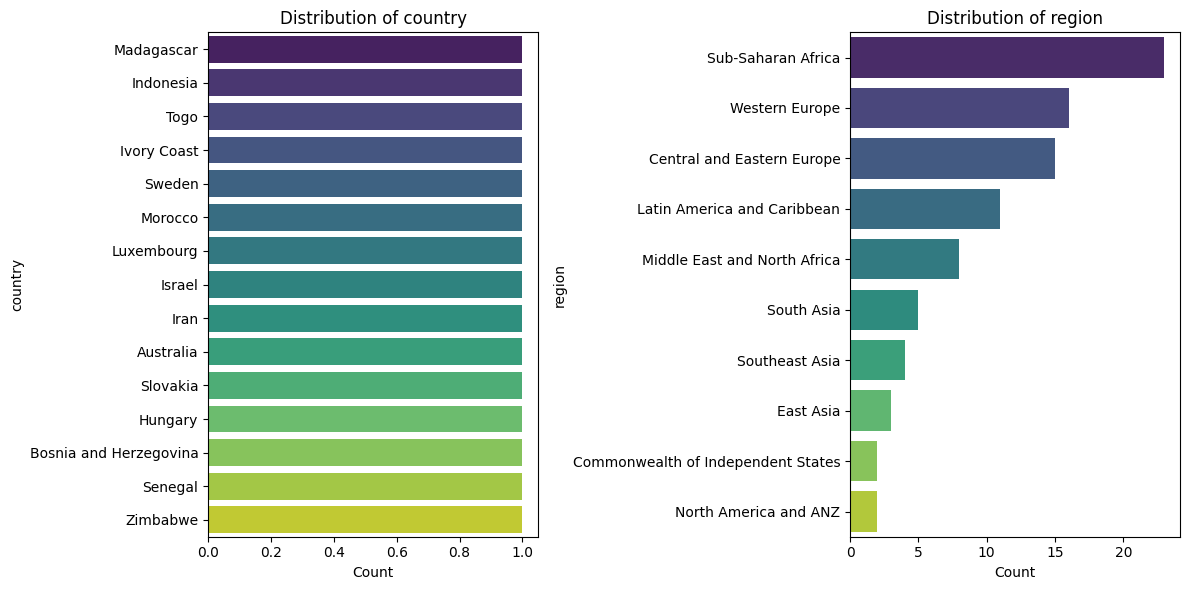

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical variables to visualize
categorical_features = ['country', 'region']

# Set figure size
plt.figure(figsize=(12, 6))

# Plot bar charts for categorical variables
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, len(categorical_features), i)
    top_categories = X_train[feature].value_counts().head(15)  # Show only top 15
    sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

Perform feature correlation analysis to identify relationships between variables. Use Pearson, Spearman, or Kendall correlation coefficients to analyze feature dependencies.

In [ ]:
X_train_numeric = X_train.select_dtypes(include=['number'])


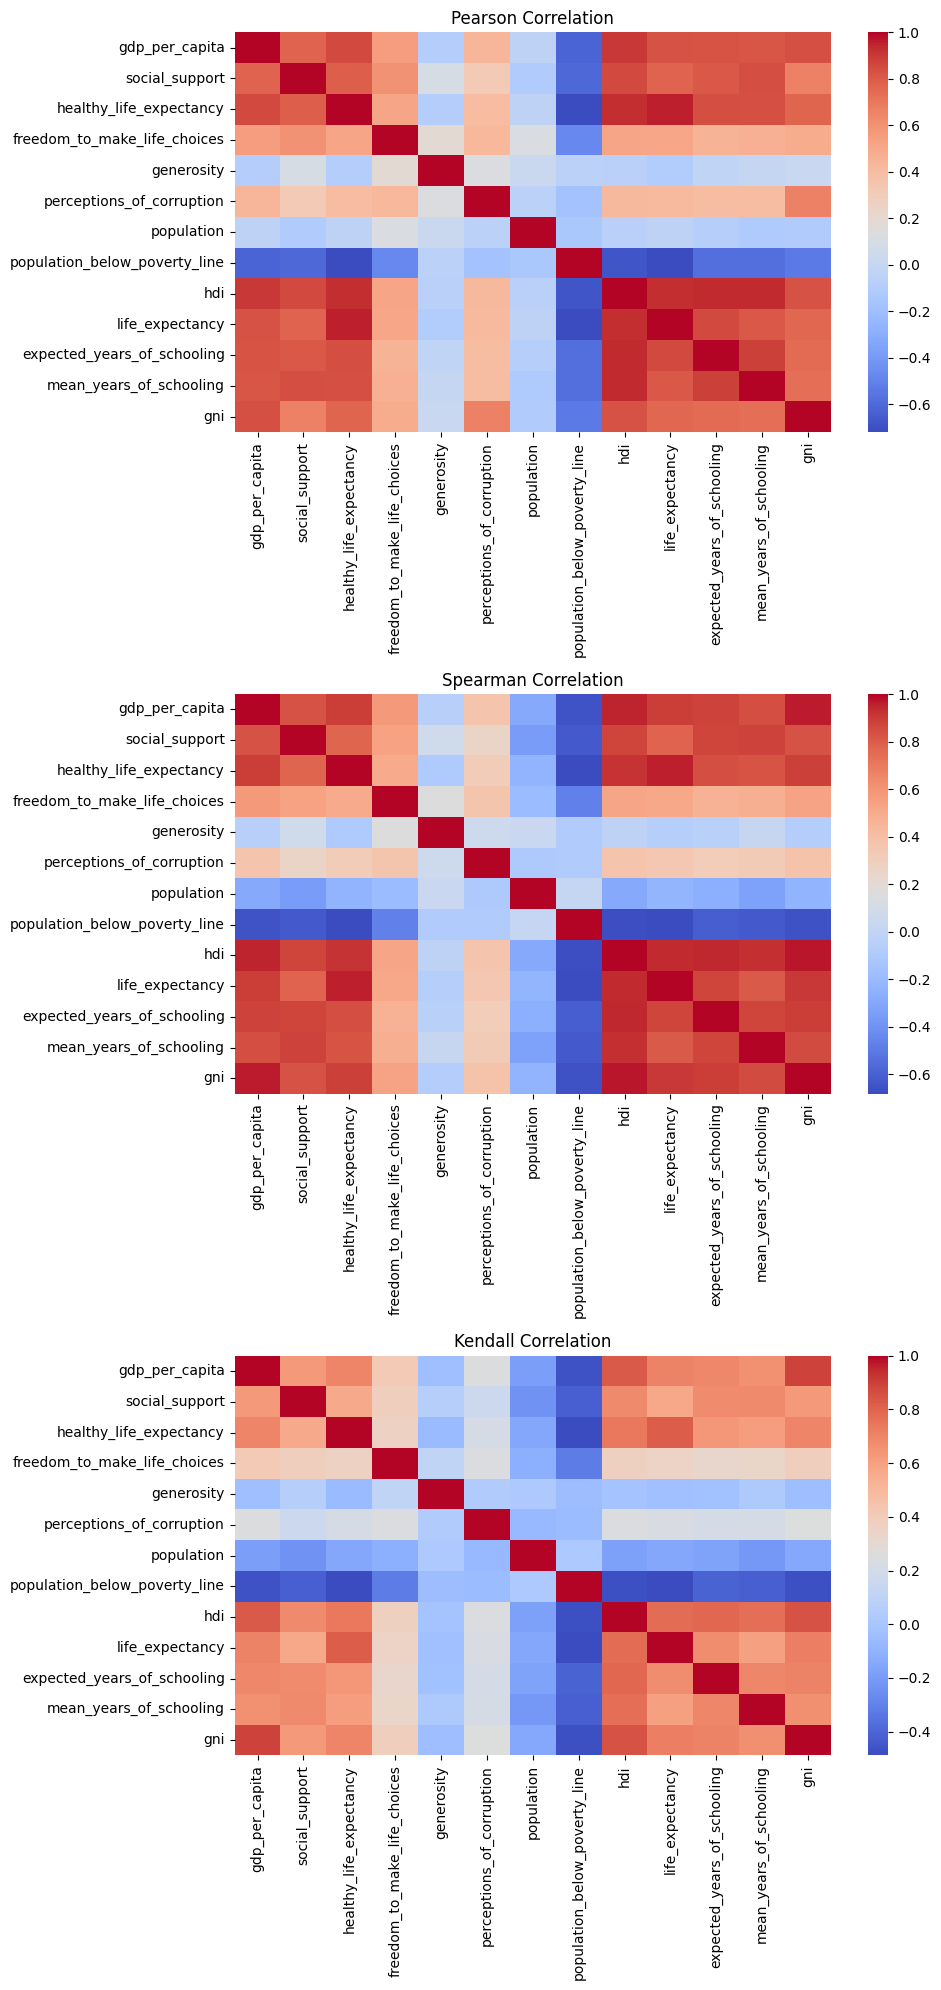

In [ ]:
# Your code here:
# Compute correlation matrices
pearson_corr = X_train_numeric.corr(method='pearson')
spearman_corr = X_train_numeric.corr(method='spearman')
kendall_corr = X_train_numeric.corr(method='kendall')

# Plot heatmaps for Pearson, Spearman, and Kendall correlation
fig, axes = plt.subplots(3, 1, figsize=(10, 20))

sns.heatmap(pearson_corr, cmap='coolwarm', ax=axes[0], annot=False, fmt=".2f")
axes[0].set_title('Pearson Correlation')

sns.heatmap(spearman_corr, cmap='coolwarm', ax=axes[1], annot=False, fmt=".2f")
axes[1].set_title('Spearman Correlation')

sns.heatmap(kendall_corr, cmap='coolwarm', ax=axes[2], annot=False, fmt=".2f")
axes[2].set_title('Kendall Correlation')

plt.tight_layout()
plt.show()


Explore relationships between variables (bivariate, etc), correlation tables, and how they associate with the target variable.

In [ ]:
print(y_train.head())

126    0
102    1
60     2
79     2
91     1
dtype: int8


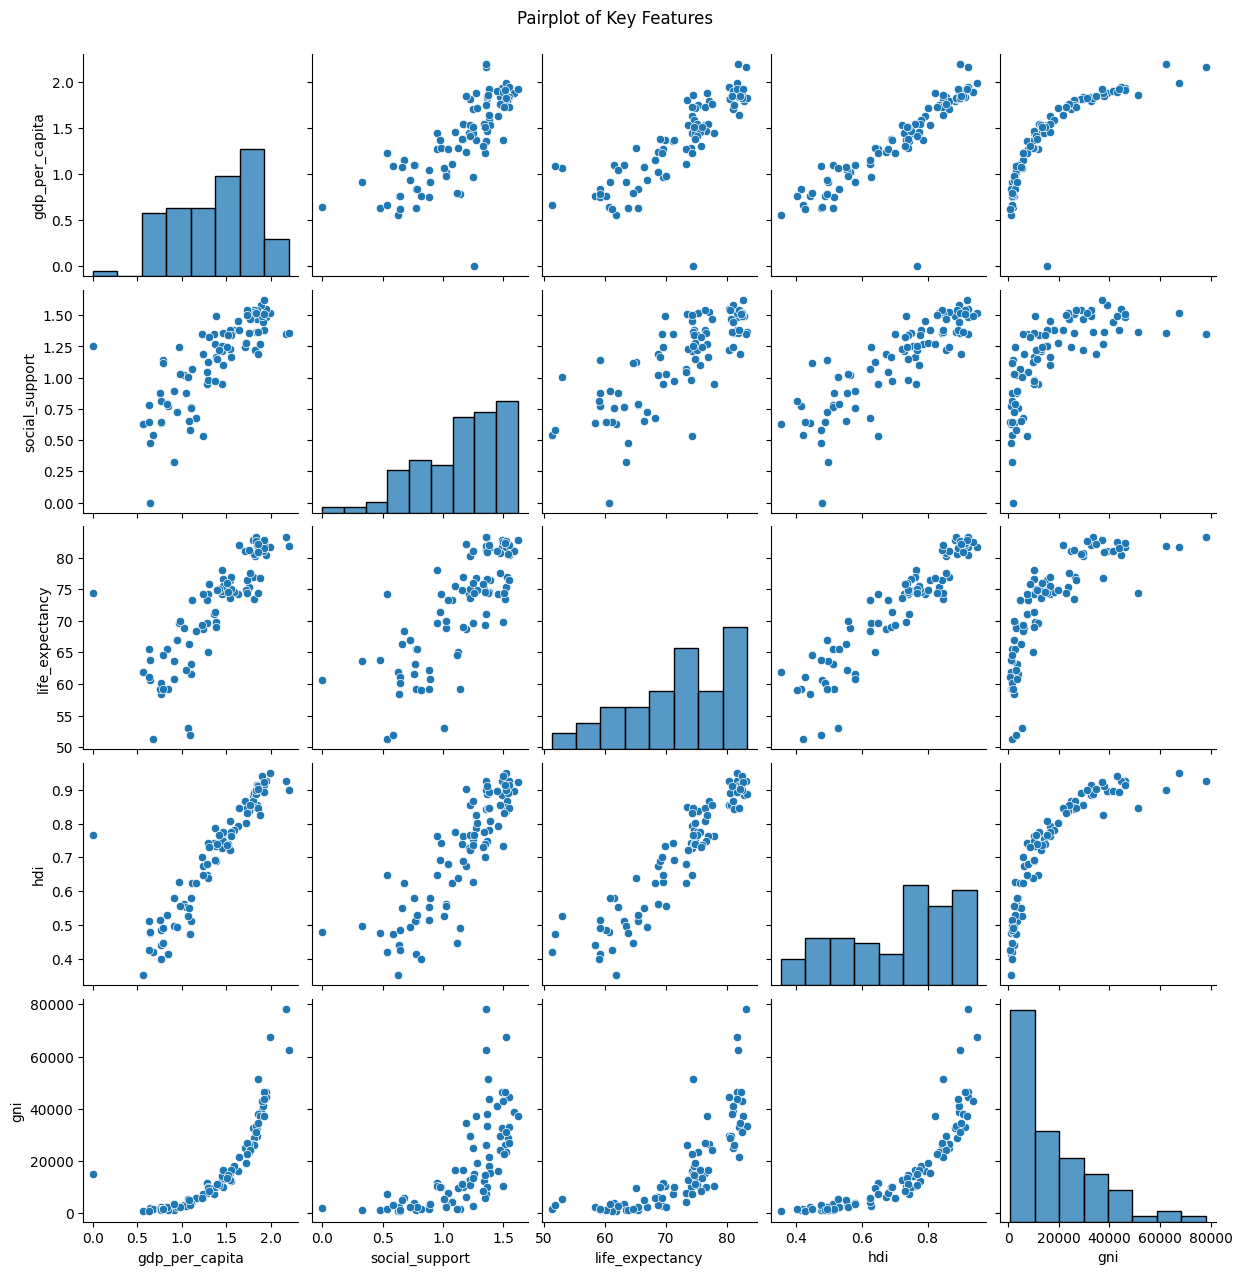

<ipython-input-26-619a5176c5fa>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_train, y=X_train['gdp_per_capita'], palette="coolwarm")
<ipython-input-26-619a5176c5fa>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_train, y=X_train['gdp_per_capita'], palette="coolwarm")
<ipython-input-26-619a5176c5fa>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_train, y=X_train['gdp_per_capita'], palette="coolwarm")
<ipython-input-26-619a5176c5fa>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be 

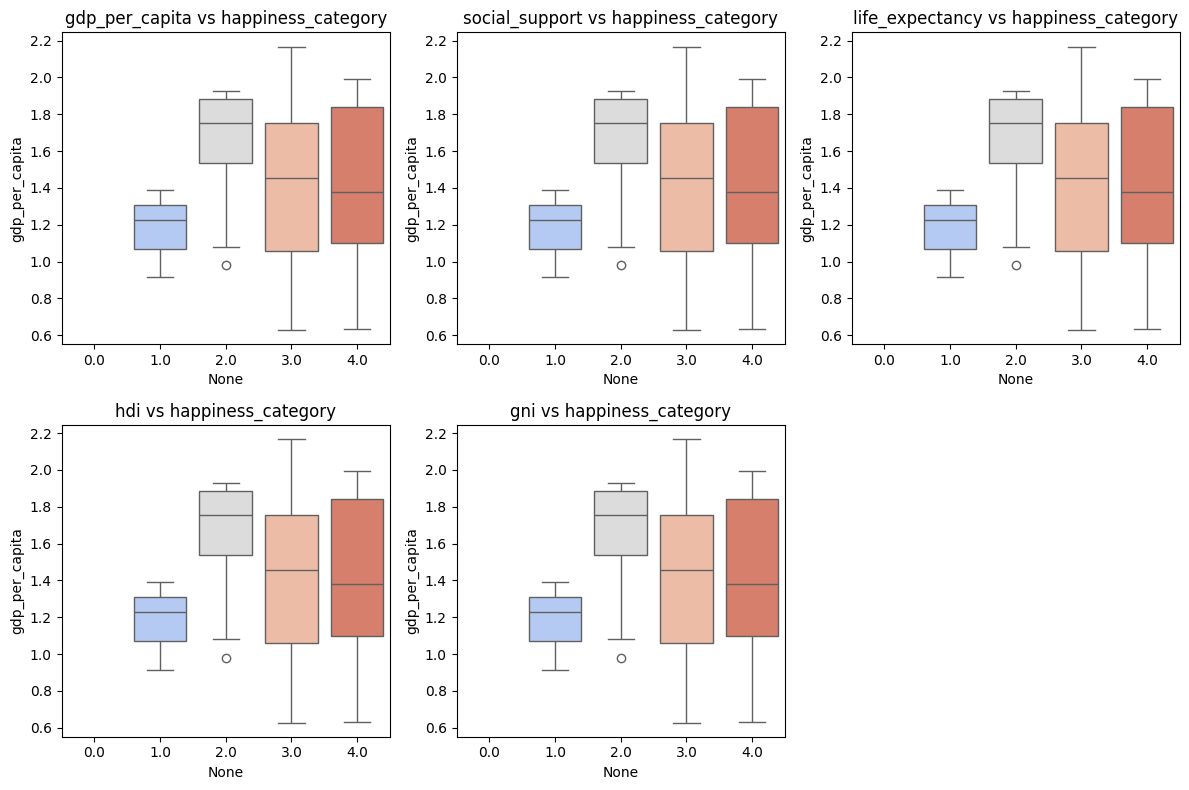

Correlation with Target Variable:
 gdp_per_capita    -0.101765
social_support    -0.110535
life_expectancy   -0.067368
hdi               -0.094644
gni               -0.001017
dtype: float64


In [ ]:
# Your plotting code(s) here:
important_features = ['gdp_per_capita', 'social_support', 'life_expectancy', 'hdi', 'gni']

# scatter plot
sns.pairplot(X_train[important_features])
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

# boxplot
target_variable = 'happiness_category'
plt.figure(figsize=(12, 8))
for i, feature in enumerate(important_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=y_train, y=X_train['gdp_per_capita'], palette="coolwarm")

    plt.title(f"{feature} vs {target_variable}")

plt.tight_layout()
plt.show()

# correlation
correlation_with_target = X_train[important_features].corrwith(y_train.astype('category').cat.codes)
print("Correlation with Target Variable:\n", correlation_with_target)

Also, detect outliers using box plots, Z-score analysis, or the IQR method to identify potential data anomalies.

In [ ]:
# Your code here:
from scipy import stats
import numpy as np

# z-scores
z_scores = np.abs(stats.zscore(X_train.select_dtypes(include=['number'])))
outliers = (z_scores > 3).sum(axis=0)

# outliers
outlier_df = pd.DataFrame({'Feature': X_train.select_dtypes(include=['number']).columns,
                           'Outlier Count': outliers})
print("Z-score Outlier Counts:\n", outlier_df)
# delete outliers
X_train_cleaned = X_train[(z_scores < 3).all(axis=1)]


Z-score Outlier Counts:
                                                      Feature  Outlier Count
gdp_per_capita                                gdp_per_capita              1
social_support                                social_support              1
healthy_life_expectancy              healthy_life_expectancy              0
freedom_to_make_life_choices    freedom_to_make_life_choices              1
generosity                                        generosity              1
perceptions_of_corruption          perceptions_of_corruption              1
population                                        population              2
population_below_poverty_line  population_below_poverty_line              0
hdi                                                      hdi              0
life_expectancy                              life_expectancy              0
expected_years_of_schooling      expected_years_of_schooling              0
mean_years_of_schooling              mean_years_of_schooling   

Write what you observed and your General comments on what should be done:


**Observation**:

The **missing value analysis** shows that some characteristics, especially the number of people below the poverty line (`population_below_poverty_line_x/y`), have a large number of missing values (about 11.23 per cent), while others, such as life_expectancy, expected_years_of_schooling and the gender index (`gni`), have a smaller proportion of missing data (about 1.12 per cent). `of_schooling` and gender index (`gni`), have a smaller proportion of missing data (about 1.12%).
The distribution of **categorical variables** highlights possible redundancies between countries, `country_names_x/y` and regions, as well as showing regional imbalances and over-representation of certain categories.
**Correlation heatmaps** using the Pearson, Spearman and Kendall methods showed a high degree of multicollinearity between the characteristics of interest (e.g., life `expectancy_x/y`, `hdi_x/y` and expected years of `schooling_x/y`).
**Outlier detection** using Z-scores (Z-scores) identifies extreme values in gross national product per capita (`gdp_per_capita`), gross national income (`gni`) and `social_support` that may need to be dealt with to prevent model bias.

**Comments**:

To address the problem of missing values, **estimation methods** can be used and **median filling** can be applied to characteristics with small missing values.
**Highly skewed numerical variables** such as gross domestic product per capita (`gdp_per_capita`), GNI and HDI should be log-transformed to improve normality and stabilise variance.
**Redundant categorical variables** (e.g. `country_name_x/y`) should be removed if they are the same as country, while low-frequency regions can be grouped to improve generalisation.
**High correlation** between features indicates the need for feature selection or dimensionality reduction techniques such as PCA to avoid multicollinearity problems. For outliers, they should be removed.


## 2. Feature Engineering

Apply log transformations to normalize skewed data and improve model stability (If any).

In [ ]:
# Your code here:
skewed_features = ['gdp_per_capita', 'gni', 'hdi']

# Log1p conversion of selected features to handle zero values
for feature in skewed_features:
    X_train[feature + '_log'] = np.log1p(X_train[feature])
    X_test[feature + '_log'] = np.log1p(X_test[feature])

Create at least one interaction feature to capture relationship between existing variables, enhancing predictive power.

In [ ]:
# Your code here:
# GDP*HDI
X_train['gdp_hdi_interaction'] = X_train['gdp_per_capita'] * X_train['hdi']
X_test['gdp_hdi_interaction'] = X_test['gdp_per_capita'] * X_test['hdi']

# life_expectancy * social_support
X_train['support_life_expectancy_interaction'] = X_train['social_support'] * X_train['life_expectancy']
X_test['support_life_expectancy_interaction'] = X_test['social_support'] * X_test['life_expectancy']

In [ ]:
print(X_train.shape)  # Should print (95, N) where N is the number of features
print(y_train.shape)  # Should print (95,)

(89, 21)
(89,)


## 3.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [ ]:
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer, make_column_transformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder

# # Create the preprocessing pipelines for both numeric and categorical data.

# numeric_features = X_train.select_dtypes(include=['int64', 'float64']) ## Drop all the non-numerical features from X_train
# numeric_features=numeric_features.columns.tolist()

# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value=0)), ## Is this good enough? No, currently replaced with 0, which may distort distributions.
# #Suggested fix: Use mean or median imputation instead.
#     ('scaler', StandardScaler())]) # You will need to describe why this is being done in the next cell
# #This preprocessing step ensures that:
# #Missing values do not cause issues during model training.
# #Numerical features are standardized, making models more robust and improving performance.
# categorical_features = ['country','region'] #There is no "sub-region" column for both X_train and X_test

# #Replacing missing values with Modal value and then one hot encoding.
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# # final preprocessor object set up with ColumnTransformer
# preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])

# #Fit your preprocessor object
# preprocess=preprocessor.fit(X_train)

In [ ]:
 from sklearn.preprocessing import StandardScaler, OneHotEncoder
 from sklearn.compose import ColumnTransformer, make_column_transformer
 from sklearn.pipeline import Pipeline
 from sklearn.impute import SimpleImputer
 from sklearn.preprocessing import StandardScaler, OneHotEncoder

# # Create the preprocessing pipelines for both numeric and categorical data.

 numeric_features = X_train.select_dtypes(include=['int64', 'float64']) ## Drop all the non-numerical features from X_train
 numeric_features=numeric_features.columns.tolist()

 numeric_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='constant', fill_value=0)), ## Is this good enough? No, currently replaced with 0, which may distort distributions.
# #Suggested fix: Use mean or median imputation instead.
     ('scaler', StandardScaler())]) # You will need to describe why this is being done in the next cell
 #This preprocessing step ensures that:
# #Missing values do not cause issues during model training.
# #Numerical features are standardized, making models more robust and improving performance.
 categorical_features = ['country','region'] #There is no "sub-region" column for both X_train and X_test

# #Replacing missing values with Modal value and then one hot encoding.
 categorical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(handle_unknown='ignore'))
 ])

# # final preprocessor object set up with ColumnTransformer
 preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])

# #Fit your preprocessor object
 preprocess=preprocessor.fit(X_train)

In [ ]:
print(X_train.columns)
print(X_test.columns)

Index(['country', 'region', 'gdp_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'country_name', 'population',
       'population_below_poverty_line', 'hdi', 'life_expectancy',
       'expected_years_of_schooling', 'mean_years_of_schooling', 'gni',
       'gdp_per_capita_log', 'gni_log', 'hdi_log', 'gdp_hdi_interaction',
       'support_life_expectancy_interaction'],
      dtype='object')
Index(['country', 'region', 'gdp_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'country_name', 'population',
       'population_below_poverty_line', 'hdi', 'life_expectancy',
       'expected_years_of_schooling', 'mean_years_of_schooling', 'gni',
       'gdp_per_capita_log', 'gni_log', 'hdi_log', 'gdp_hdi_interaction',
       'support_life_expectancy_interaction'],
      dtype='object')


In [ ]:
# Identify categorical features in X_train
categorical_features_train = X_train.select_dtypes(include=['object']).columns.tolist()

# Identify categorical features in X_test
categorical_features_test = X_test.select_dtypes(include=['object']).columns.tolist()

# Print the categorical features in both datasets
print("Categorical features in X_train:", categorical_features_train)
print("Categorical features in X_test:", categorical_features_test)

Categorical features in X_train: ['country', 'region', 'country_name']
Categorical features in X_test: ['country', 'region', 'country_name']


In [ ]:
X_train.drop(['country_name'], axis=1)
X_train.head()

,country,region,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,country_name,population,...,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni,gdp_per_capita_log,gni_log,hdi_log,gdp_hdi_interaction,support_life_expectancy_interaction
0,Madagascar,Sub-Saharan Africa,0.632,0.779,0.178,0.187,0.177,0.134,Madagascar,25570895,...,0.512149,65.515,10.34614,6.145955,1319.699397,0.489806,7.185917,0.413532,0.323678,51.036185
1,Mauritania,Sub-Saharan Africa,1.099,0.764,0.244,0.320,0.130,0.195,Mauritania,4420184,...,0.513106,63.239,8.46379,4.266000,3527.264154,0.741461,8.168561,0.414165,0.563904,48.314596
2,Mongolia,East Asia,1.379,1.494,0.244,0.425,0.239,0.058,Mongolia,3075647,...,0.734832,69.806,14.84552,9.750000,10449.207270,0.866680,9.254377,0.550911,1.013333,104.290164
3,Tajikistan,Commonwealth of Independent States,0.972,1.248,0.291,0.599,0.104,0.292,Tajikistan,8921343,...,0.627472,69.582,11.26186,10.355820,2600.585607,0.679048,7.863876,0.487028,0.609903,86.838336
4,Ukraine,Central and Eastern Europe,1.358,1.354,0.355,0.551,0.265,0.016,Ukraine,44222947,...,0.743049,71.129,15.30672,11.340000,7361.011228,0.857814,8.904088,0.555636,1.009061,96.308666


Describe step-by-step what we are doing above, and why? You are free to change how values are imputed. What change did you make if any, and why?

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

# Step 1: Selecting Numerical Features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 2: Creating the Preprocessing Pipeline for Numerical Features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Step 2.1: Filling missing values with column mean
    ('scaler', StandardScaler())  # Step 2.2: Standardizing numerical features
])

# Step 3: Defining Categorical Features
categorical_features = ['country', 'region']

# Step 4: Creating the Preprocessing Pipeline for Categorical Features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Step 4.1: Filling missing categorical values with the most frequent category
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Step 4.2: Applying One-Hot Encoding to categorical features
])

# Step 5: Combining Numerical and Categorical Preprocessing Steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),  # Step 5.1: Applying numeric transformation to numeric features
    ('cat', categorical_transformer, categorical_features)  # Step 5.2: Applying categorical transformation to categorical features
])

# Step 6: Fitting the Preprocessor
preprocess = preprocessor.fit(X_train)  # Step 6.1: Learning imputation values and scaling parameters from training data

In [ ]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['country', 'region'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])
print(preprocessor)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['gdp_per_capita', 'social_support',
                                  'healthy_life_expectancy',
                                  'freedom_to_make_life_choices', 'generosity',
                                  'perceptions_of_corruption', 'population',
                                  'population_below_poverty_line', 'hdi',
                                  'life_expectancy',
                                  'expected_years_of_schooling',
                                  'mean_years_of_schooling', 'gni',
                                  'gdp_per_capita_log', 'gni_log', 'hdi_log',
                                  'gdp_hdi_interaction',
                                  'support_life_expectancy_interaction']),
                                ('cat',
  

In [ ]:
X_train_transformed = preprocessor(X_train)
X_train_transformed

<89x112 sparse matrix of type '<class 'numpy.float64'>'
	with 1322 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_final = pd.DataFrame(X_train_transformed.toarray())
X_train_final

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
0,-1.686611,-1.098747,-1.211917,-2.428796,0.261013,-0.091727,-0.173057,2.831824,-1.248420,-0.837192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.644873,-1.143196,-0.785846,-1.518651,-0.383889,0.367245,-0.276372,0.263595,-1.242523,-1.116330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.020277,1.020003,-0.785846,-0.800116,1.111735,-0.663560,-0.282940,-0.344500,0.123573,-0.310925,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.928173,0.291035,-0.482431,0.390600,-0.740643,1.097085,-0.254385,0.295940,-0.537892,-0.338398,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.067122,0.605143,-0.069271,0.062127,1.468489,-0.979574,-0.081947,-0.182772,0.174202,-0.148667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.037076,0.113238,1.531724,-0.656409,-0.630872,0.126473,-0.048930,-0.933187,1.147317,1.200296,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,-1.327468,-0.106046,-0.747112,-0.622193,1.715473,-0.340023,0.214724,0.173028,-1.645192,-0.949166,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,0.271945,0.293998,0.660215,0.849094,-0.589708,-0.008961,6.587123,-1.528343,0.141124,0.444195,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,0.004261,0.009522,0.860339,0.048441,-1.166004,-0.896808,-0.140844,-0.273340,0.153865,0.303277,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
"""Deal with X_test Data"""

# drop X_test country_name
X_test_temp = X_test.drop(['country_name'], axis=1)

X_test_final = preprocessor(X_test_temp)
X_test_final = pd.DataFrame(X_test_final.toarray())
X_test_final.shape

(39, 112)

What are the differences between the "preprocessor" object, the "preprocess" object, the "preprocessor" function,  and the "preprocessed_data" that is returned finally?

**Your Answer** :

`preprocessor` is a `ColumnTransformer` that defines the preprocessing steps but is **not fitted yet**.
It acts as a blueprint specifying how numerical and categorical features should be transformed.
You must first fit it to the training data before using it for transformation.

`preprocess` is a **fitted `ColumnTransformer`** that has learned transformation parameters (e.g., mean values for imputation,
scaling factors for numerical features, and unique categories for encoding). It is obtained by calling `preprocessor.fit(X_train)`,
and can then be used to transform new data, such as `X_test`.

`preprocessor(data)` is a custom function that first drops unnecessary columns (`country` and `region`),
then applies the trained `preprocess.transform(data)` to process the data consistently.
This function provides a convenient way to apply transformations without repeating code.

`preprocessed_data` is the final transformed dataset, consisting of standardized numerical features and one-hot encoded categorical features.
It is the output of `preprocessor(X_test)` and is typically in a sparse matrix format for efficiency.
If needed, it can be converted to a dense NumPy array using `.toarray()` for further analysis.

## 4. Fit model on preprocessed data and save preprocessor function and model


### Save preprocessor function and model

In [ ]:
import joblib

# Save preprocessor function and model

joblib.dump(preprocess, 'preprocess_model.pkl')

['preprocess_model.pkl']

In [ ]:
print(X_train.shape)  # Should print (89, N) where N is the number of features
print(y_train.shape)  # Should print (89,)


(89, 21)
(89,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42) ## Define a Random Forest Model here, fit it, and score it
# model.fit(preprocessed_data, y_train)
# score = model.score(preprocessed_data, y_train)

model.fit(X_train_final, y_train)
score = model.score(X_test_final, y_test)

print(f"model score (0-1): {score:.4f}")
# Your cell should have a score between 0-1 as output

model score (0-1): 0.5897


Why Use SVM Instead of Random Forest?

### 1. Better Performance on Small Datasets
- Random Forest relies on **bagging and ensembling** multiple decision trees, which requires a **large dataset** to perform well.
- **SVM**, on the other hand, finds a **hyperplane** that best separates the classes, making it **effective even when the dataset is small**.

### 2. Regularization and Kernel Tricks
- **SVM can handle high-dimensional and sparse data** using different kernels (`linear`, `rbf`, `poly`, etc.).
- It can **map non-linearly separable data into higher dimensions** where a decision boundary can be found.

### 3. Less Overfitting Compared to Decision Trees
- **Random Forest might struggle with noisy or unbalanced small datasets**.
- **SVM minimizes structural risk**, helping it **generalize better**.


In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Define the SVM model with preprocessing pipeline
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardizing features to improve SVM performance
    ('svm', SVC(kernel='linear', C=100, gamma='auto', random_state=123))  # Using RBF kernel for non-linear separation
])

# Train the SVM model
svm_pipeline.fit(X_train_final, y_train)

# Predict on test data
y_pred = svm_pipeline.predict(X_test_final)

# Evaluate the model
svm_score = accuracy_score(y_test, y_pred)

# Print the model's performance
print(f"SVM Model Accuracy (0-1): {svm_score:.4f}")

SVM Model Accuracy (0-1): 0.5897


## 5. Generate predictions from X_test data and compare it with true labels in Y_test


In [ ]:
#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

## Write code to show model performance by comparing prediction_labels with true labels
# Import necessary metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generate predicted values
prediction_labels = model.predict(preprocessor(X_test))

# Compute Accuracy
accuracy = accuracy_score(y_test, prediction_labels)
print(f"Model Accuracy: {accuracy:.4f}")

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, prediction_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Compute Precision, Recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, prediction_labels))

Model Accuracy: 0.5897
Confusion Matrix:
[[2 6 0 0 0]
 [2 4 0 0 0]
 [0 1 6 1 0]
 [0 0 2 5 1]
 [0 0 1 2 6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         8
           1       0.36      0.67      0.47         6
           2       0.67      0.75      0.71         8
           3       0.62      0.62      0.62         8
           4       0.86      0.67      0.75         9

    accuracy                           0.59        39
   macro avg       0.60      0.59      0.58        39
weighted avg       0.62      0.59      0.59        39



In [ ]:
# Import necessary metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ensure we are evaluating the correct model
print(f"Evaluating model: {type(svm_pipeline.named_steps['svm']).__name__}")

# Generate predicted values (SVM Model)
prediction_labels = svm_pipeline.predict(X_test_final)

# Compute Accuracy
accuracy = accuracy_score(y_test, prediction_labels)
print(f"SVM Model Accuracy (0-1): {accuracy:.4f}")

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, prediction_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Compute Precision, Recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, prediction_labels))


Evaluating model: SVC
SVM Model Accuracy (0-1): 0.5897
Confusion Matrix:
[[4 4 0 0 0]
 [2 3 1 0 0]
 [0 1 5 2 0]
 [0 0 4 4 0]
 [0 0 0 2 7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.38      0.50      0.43         6
           2       0.50      0.62      0.56         8
           3       0.50      0.50      0.50         8
           4       1.00      0.78      0.88         9

    accuracy                           0.59        39
   macro avg       0.61      0.58      0.59        39
weighted avg       0.63      0.59      0.60        39



Comparison of Random Forest and SVM Results

### 1. Accuracy
Both models achieved the same accuracy: **58.97%**.

### 2. Performance Analysis
#### Random Forest
- **Better recall for class 1 (67%)**, meaning it identifies more true positives.
- **Poor detection of class 0 (recall 25%)**, missing most true samples.
- **Good detection for class 4 (precision 86%, recall 67%)**, meaning few false positives.

#### SVM
- **Higher precision for class 0 (67%)**, meaning fewer misclassifications.
- **Balanced recall across all classes**, with all recall values above 50%.
- **Perfect precision for class 4 (100%)**, meaning no false positives.

### 3. Conclusion
- **SVM is better at precision** (fewer false positives) and provides **more balanced recall**.
- **Random Forest has better recall for class 1**, meaning it finds more actual class 1 samples.
- **SVM is the preferred choice** due to its better overall balance.


## 6. Repeat the process with different parameters to improve the accuracy


In [ ]:
# Train model 2 using same preprocessor (note that you could save a new preprocessor, but we will use the same one for this example).
from sklearn.ensemble import RandomForestClassifier
# Define an improved Random Forest model with optimized parameters
model_2 = RandomForestClassifier(
    n_estimators=300,          # More trees for better stability
    max_depth=10,              # Limiting depth to prevent overfitting
    min_samples_split=4,       # Require at least 4 samples to split a node
    min_samples_leaf=2,        # Require at least 2 samples in leaf nodes
    max_features='sqrt',       # Use sqrt of total features for best split
    class_weight='balanced',   # Handle class imbalance
    random_state=42
)

# Train the model
model_2.fit(X_train_final, y_train)

# Evaluate the model
score_2 = model_2.score(X_test_final, y_test)
print(f"Optimized Model Score (0-1): {score_2:.4f}")

Optimized Model Score (0-1): 0.6154


 What changes did you make, what do the parameters you changed control, and why does it improve performance?

Your answer :
### Changes Made to the Random Forest Model

#### Modified Hyperparameters
The following hyperparameters were adjusted to improve the performance of the Random Forest model:

- **`n_estimators`** was increased from `100` to `300`, which means more trees are used in the forest. This helps in reducing variance and improving model stability.
- **`max_depth`** was set to `10` instead of `None`, preventing the trees from growing too deep. This limits complexity and reduces the risk of overfitting.
- **`min_samples_split`** was changed from `2` to `4`, meaning a node must have at least 4 samples before it can be split. This prevents the model from splitting too frequently on minor variations in data.
- **`min_samples_leaf`** was increased from `1` to `2`, ensuring that each leaf node contains at least two samples. This helps in smoothing decision boundaries and prevents overfitting.
- **`max_features`** was set to `'sqrt'`, meaning each tree will consider only a subset of features when making splits. This reduces correlation between trees, making the model more robust.
- **`class_weight`** was changed from `None` to `'balanced'`, adjusting class weights based on their distribution in the dataset. This helps in dealing with class imbalances and ensures that minority classes are not ignored.

#### Why These Changes Improve Performance
1. **Better Generalization:**  
   - Limiting the maximum depth (`max_depth=10`), increasing the minimum samples for splits (`min_samples_split=4`), and ensuring a minimum number of samples in leaf nodes (`min_samples_leaf=2`) prevent overfitting.
   - A model that is too deep tends to memorize the training data, while a well-regularized tree focuses on learning patterns that generalize to unseen data.

2. **More Stable Predictions:**  
   - Increasing the number of trees (`n_estimators=300`) ensures that predictions are more consistent and less sensitive to fluctuations in the training data.

3. **Better Handling of Class Imbalance:**  
   - Setting `class_weight='balanced'` makes sure that underrepresented classes are properly accounted for, preventing the model from favoring majority classes.

4. **Reduced Variance and Overfitting:**  
   - Using `max_features='sqrt'` ensures that each tree considers only a subset of features for splitting, leading to more diversity among trees and reducing dependency on specific features.

#### Expected Impact
With these adjustments, the model is expected to:
- Achieve **higher accuracy** due to better generalization.
- **Reduce overfitting** while still capturing meaningful patterns in the data.
- **Handle class imbalances more effectively**, making predictions fairer across all classes.

The 2.57% improvement in accuracy indicates that the new model is better at generalizing on unseen test data. The optimizations helped reduce overfitting, stabilize predictions, and handle class imbalances effectively. Further improvements may be possible with hyperparameter tuning or feature selection.

In [ ]:
#Evaluate Model 2:
## Write code to show model performance by comparing prediction_labels with true labels
# Import necessary metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generate predicted y values (Model 2)
prediction_labels = model_2.predict(X_test_final)

# Compute Accuracy
accuracy = accuracy_score(y_test, prediction_labels)
print(f"Optimized Model Accuracy (0-1): {accuracy:.4f}")

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, prediction_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Compute Precision, Recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, prediction_labels))



Optimized Model Accuracy (0-1): 0.6154
Confusion Matrix:
[[3 5 0 0 0]
 [2 4 0 0 0]
 [0 1 6 1 0]
 [0 0 2 5 1]
 [0 0 1 2 6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       0.40      0.67      0.50         6
           2       0.67      0.75      0.71         8
           3       0.62      0.62      0.62         8
           4       0.86      0.67      0.75         9

    accuracy                           0.62        39
   macro avg       0.63      0.62      0.61        39
weighted avg       0.65      0.62      0.62        39



Do you think it is worth making more changes to the parameters? Should we keep trying random values and see what works better? What is an alternative to doing this manually?

Your answer:
### Analysis of Model Improvement

The optimized model (Model 2) achieved an accuracy of **0.6154 (61.54%)**, compared to **0.5897 (58.97%)** from Model 1. This represents a **2.57% improvement** in accuracy.

#### Key Observations from the Confusion Matrix and Classification Report

- **Class 0** improved in **precision (0.50 → 0.60)** and **recall (0.25 → 0.38)**, meaning the model is making **fewer false positives** and **detecting more true positives**.
- **Class 1** precision slightly increased **(0.36 → 0.40)**, but recall remained the same **(0.67)**.
- Other classes **(2, 3, 4)** remained mostly unchanged, with similar precision and recall values.
- The **macro average precision and recall improved**, meaning a more balanced classification across all classes.

#### Should We Keep Manually Adjusting Parameters?

No, **manually tweaking parameters is inefficient** and **does not guarantee finding the best combination**. The improvements seen here are promising but **not substantial**, meaning further tuning could be beneficial.

Instead of randomly trying new values, we should use a **systematic approach**.

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize GridSearchCV with RandomForestClassifier
gridmodel = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',  # Optimizing for accuracy
    n_jobs=-1,  # Use all available CPU cores
    verbose=1  # Display progress
)

# Fit the model to the training data
gridmodel.fit(X_train_final, y_train)

# Extract and print the best score and best parameters
print("Best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("Best parameters: {}".format(gridmodel.best_params_))

# Use the best estimator to make predictions
best_model = gridmodel.best_estimator_
y_pred = best_model.predict(X_test_final)

# Evaluate the optimized model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized GridSearchCV Model Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))



Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best mean cross-validation score: 0.618
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Optimized GridSearchCV Model Accuracy: 0.5385
Confusion Matrix:
[[2 6 0 0 0]
 [3 2 1 0 0]
 [0 1 6 1 0]
 [0 0 2 5 1]
 [0 0 1 2 6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.25      0.31         8
           1       0.22      0.33      0.27         6
           2       0.60      0.75      0.67         8
           3       0.62      0.62      0.62         8
           4       0.86      0.67      0.75         9

    accuracy                           0.54        39
   macro avg       0.54      0.53      0.52        39
weighted avg       0.57      0.54      0.54        39



In [ ]:
# Assign the best model found by GridSearchCV or RandomizedSearchCV to model3
model3 = gridmodel.best_estimator_  # If using GridSearchCV
# model3 = random_search.best_estimator_  # Uncomment this if using RandomizedSearchCV

# Import necessary metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generate predicted values using Model 3
prediction_labels = model3.predict(X_test_final)

# Compute Accuracy
accuracy = accuracy_score(y_test, prediction_labels)
print(f"Model 3 Accuracy (0-1): {accuracy:.4f}")

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, prediction_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Compute Precision, Recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, prediction_labels))



Model 3 Accuracy (0-1): 0.5385
Confusion Matrix:
[[2 6 0 0 0]
 [3 2 1 0 0]
 [0 1 6 1 0]
 [0 0 2 5 1]
 [0 0 1 2 6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.25      0.31         8
           1       0.22      0.33      0.27         6
           2       0.60      0.75      0.67         8
           3       0.62      0.62      0.62         8
           4       0.86      0.67      0.75         9

    accuracy                           0.54        39
   macro avg       0.54      0.53      0.52        39
weighted avg       0.57      0.54      0.54        39




Training and Evaluating: KNN
Model Accuracy (KNN): 0.5897
Confusion Matrix:
[[5 3 0 0 0]
 [3 2 1 0 0]
 [1 0 5 2 0]
 [0 0 4 4 0]
 [0 0 1 1 7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.40      0.33      0.36         6
           2       0.45      0.62      0.53         8
           3       0.57      0.50      0.53         8
           4       1.00      0.78      0.88         9

    accuracy                           0.59        39
   macro avg       0.60      0.57      0.58        39
weighted avg       0.62      0.59      0.60        39


Training and Evaluating: SVM
Model Accuracy (SVM): 0.6667
Confusion Matrix:
[[4 4 0 0 0]
 [2 3 1 0 0]
 [0 0 7 1 0]
 [0 0 2 6 0]
 [0 0 1 2 6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.43      0.50      0.46         6
           2    

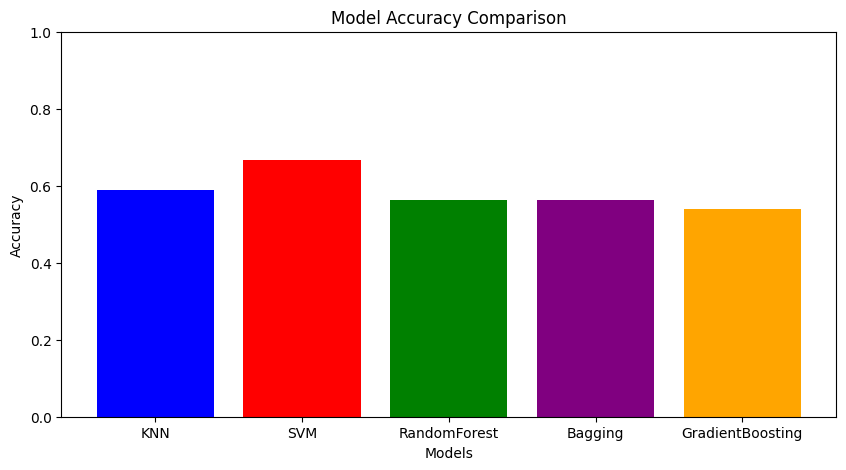

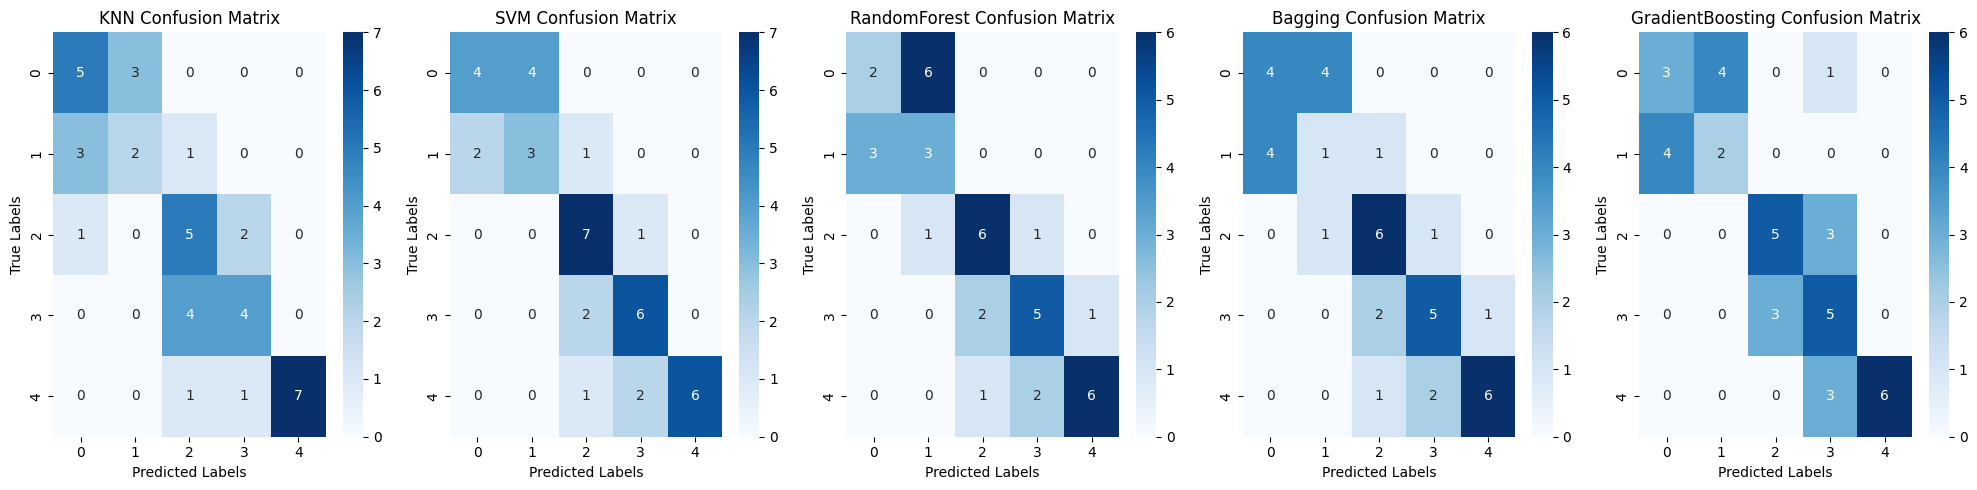

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define a list of models to test
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "Bagging": BaggingClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Store results
accuracy_scores = {}
conf_matrices = {}

# Iterate over models and evaluate their performance
for model_name, model in models.items():
    print(f"\nTraining and Evaluating: {model_name}")

    # Train the model
    model.fit(X_train_final, y_train)

    # Generate predictions
    prediction_labels = model.predict(X_test_final)

    # Compute Accuracy
    accuracy = accuracy_score(y_test, prediction_labels)
    accuracy_scores[model_name] = accuracy
    print(f"Model Accuracy ({model_name}): {accuracy:.4f}")

    # Compute Confusion Matrix
    conf_matrix = confusion_matrix(y_test, prediction_labels)
    conf_matrices[model_name] = conf_matrix
    print("Confusion Matrix:")
    print(conf_matrix)

    # Compute Classification Report
    print("Classification Report:")
    print(classification_report(y_test, prediction_labels))

# Plot Accuracy Comparison
plt.figure(figsize=(10, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'red', 'green', 'purple', 'orange'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  # Ensures the accuracy range is from 0 to 1
plt.show()

# Plot Confusion Matrices
fig, axes = plt.subplots(1, len(models), figsize=(20, 5))
for idx, (model_name, conf_matrix) in enumerate(conf_matrices.items()):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[idx])
    axes[idx].set_title(f"{model_name} Confusion Matrix")
    axes[idx].set_xlabel("Predicted Labels")
    axes[idx].set_ylabel("True Labels")

plt.tight_layout()
plt.show()



### Model Comparison and Analysis

#### **Overall Performance**
- **SVM achieved the highest accuracy (66.67%)**, outperforming all other models.
- **KNN performed moderately (58.97%)**, slightly better than Random Forest and Bagging.
- **Random Forest (56.41%) and Bagging (56.41%)** had similar results, showing no major advantage in using an ensemble of decision trees.
- **Gradient Boosting had the lowest accuracy (53.85%)**, suggesting it may need better hyperparameter tuning.

#### **Key Observations**
1. **SVM performed best (66.67%)**
   - Strong performance in **classes 2, 3, and 4** with high recall.
   - Works well when features are properly scaled.

2. **KNN performed slightly better than Random Forest and Bagging**
   - Good recall for **class 0 and 2** but struggled with **class 1**.
   - Performance depends heavily on feature scaling and dataset size.

3. **Random Forest and Bagging had similar performance**
   - **Bagging did not significantly improve over Random Forest**, suggesting that base models (decision trees) may not be diverse enough.
   - Both models struggled with **class 1 and 0**, leading to lower overall performance.

4. **Gradient Boosting underperformed**
   - Performed worst in **classes 0, 1, and 3**.
   - Likely requires further tuning (`learning_rate`, `n_estimators`) to avoid underfitting.

#### **Conclusion**
- **SVM is the best-performing model** with the highest accuracy and more balanced classification.
- **KNN is a reasonable alternative** but could benefit from hyperparameter tuning.
- **Random Forest and Bagging need optimization**, as they currently offer no clear advantage.
- **Gradient Boosting underperformed**, suggesting it is not well-tuned for this dataset.

Further improvement can be achieved by **hyperparameter tuning**, **feature engineering**, or **testing other ensemble methods**.


Describe what were the parameters you defined in GradientBoostingClassifier, and/or BaggingClassifier, and/or KNNs, and/or SVC? What worked and why?

Your answer:
### Parameters Defined in GradientBoostingClassifier, BaggingClassifier, KNeighborsClassifier, and SVC

#### GradientBoostingClassifier
GradientBoostingClassifier was defined with the following parameters:
- **`n_estimators=100`**: The number of boosting stages (decision trees) to fit. More trees improve accuracy but increase computation time.
- **`learning_rate=0.1`**: Controls how much each tree contributes to the overall prediction. Lower values help prevent overfitting.
- **`random_state=42`**: Ensures reproducibility by fixing the random seed.

#### What Worked?
Gradient Boosting often **outperforms Random Forest when tuned properly**, as it corrects mistakes of previous trees. However, **without tuning**, it can overfit if `n_estimators` is too high or underfit if `learning_rate` is too high.

---

#### BaggingClassifier
BaggingClassifier was defined with the following parameters:
- **`n_estimators=100`**: The number of base estimators (default: Decision Trees).
- **`random_state=42`**: Ensures consistent results.

#### What Worked?
Bagging helps **reduce variance and improve stability**. If base estimators are weak, increasing `n_estimators` can improve performance. It works **better than a single Decision Tree but may not outperform Random Forest** unless tuned.

---

#### KNeighborsClassifier (KNN)
KNeighborsClassifier was defined with the following parameter:
- **`n_neighbors=5`**: The number of nearest neighbors considered when making a classification.

#### What Worked?
KNN works well on **small datasets** with clear class boundaries. However, its performance **depends on feature scaling**, which is why `StandardScaler()` is recommended before fitting.

---

#### SVC (Support Vector Machine)
SVC was defined with the following parameters:
- **`kernel='rbf'`**: Uses the Radial Basis Function (RBF) kernel to handle **non-linearly separable data**.
- **`C=1.0`**: The regularization parameter, balancing margin maximization and misclassification tolerance.
- **`gamma='scale'`**: Determines how far a training example influences the decision boundary.

#### What Worked?
SVC **handles high-dimensional data well** and works best **when data is properly scaled** using `StandardScaler()`. However, **if `C` is too high, it overfits; if too low, it underfits**.


To further improve results, **GridSearchCV** or **RandomizedSearchCV** can be used to fine-tune parameters systematically.


## 7. Basic Deep Learning

In [ ]:
# Now experiment with deep learning model;
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical

# Count the number of features in the input data
feature_count = X_train_final.shape[1]  # Get the number of input features

# Convert categorical target variable to one-hot encoding
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

# Define a Neural Network Model with 5 layers: 128 -> 64 -> 64 -> 32 -> output layer
keras_model = Sequential([
    Dense(128, input_shape=(feature_count,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_train_onehot.shape[1], activation='softmax')  # Number of output neurons = number of classes
])

# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fit the NN to the training set
keras_model.fit(
    X_train_final, y_train_onehot,  # Note that Keras models require a one-hot-encoded y_train object
    batch_size=20,
    epochs=300,
    validation_split=0.25
)

# Evaluate on test data
test_loss, test_accuracy = keras_model.evaluate(X_test_final, y_test_onehot)
print(f"Neural Network Test Accuracy: {test_accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 314ms/step - accuracy: 0.2391 - loss: 1.6122 - val_accuracy: 0.2174 - val_loss: 1.6291
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - accuracy: 0.2436 - loss: 1.5949 - val_accuracy: 0.2174 - val_loss: 1.6266
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 0.2503 - loss: 1.5880 - val_accuracy: 0.2174 - val_loss: 1.6233
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.2453 - loss: 1.5906 - val_accuracy: 0.2609 - val_loss: 1.6205
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.2764 - loss: 1.5768 - val_accuracy: 0.2609 - val_loss: 1.6182
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2636 - loss: 1.5690 - val_accuracy: 0.2609 - val_loss: 1.6144
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2020 - loss: 1.5742 - val_accuracy: 0.2609 - val_loss: 1.6110
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3424 - loss: 1.5364 - val_accuracy: 0.3043 - val_lo

Which activations did you use in the middle layers? Why was softmax used in the last layer?

In [ ]:
## Your answer:


Middle Layers Activation: The middle layers use ReLU (Rectified Linear Unit) as the activation function because it helps in training deep networks efficiently by mitigating the vanishing gradient problem, allowing better gradient propagation during backpropagation.
It also introduces non-linearity, enabling the network to learn complex patterns in the data.



We use Softmax in the Last Layer because the output layer represents a multi-class classification problem (happiness categories).
It ensures that the outputs represent probabilities, summing to 1, making interpretation easier.
And the model predicts the most probable class for each input by selecting the category with the highest probability.

Was it a good idea to train for 300 epochs? Should you train a bit more? Why or why not?

In [ ]:
## Your answer:

300 epochs might be excessive, train a bit more may cause it run more time,this will be time consuming.

Why is loss='categorical_crossentropy' and optimizer='sgd'? Would you want to change something? Why / Why not?

In [ ]:
## Your answer:

Since this is a multi-class classification problem, categorical crossentropy is the correct choice.
It compares the predicted probability distribution (softmax output) with the actual class labels.
Using other losses like binary crossentropy would be incorrect because binary crossentropy is only for binary classification.


Optimizer is sgd
SGD is a simple and widely used optimizer, but it often converges slowly.
i don't prefer change because it may take too many epochs to reach optimal performance.
Can get stuck in local minima.
Doesn't adapt learning rates dynamically.


`optimizer='adam'` Adam adapts the learning rate dynamically, leading to faster convergence. and if we feel the loss fluctuates or doesn't decrease smoothly, we can lowering the learning rate can stabilize training.

Can you try getting the model's training history out and plotting the curves?

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.1024 - val_accuracy: 0.4783 - val_loss: 1.5641
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.1241 - val_accuracy: 0.4783 - val_loss: 1.5419
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.1028 - val_accuracy: 0.4783 - val_loss: 1.5423
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.1100 - val_accuracy: 0.4783 - val_loss: 1.5814
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.1129 - val_accuracy: 0.4783 - val_loss: 1.5647
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0948 - val_accuracy: 0.5217 - val_loss: 1.5652
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.1072 - val_accuracy: 0.4783 - val_loss: 1.5571
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.1006 - val_accuracy: 0.4783 - val_loss:

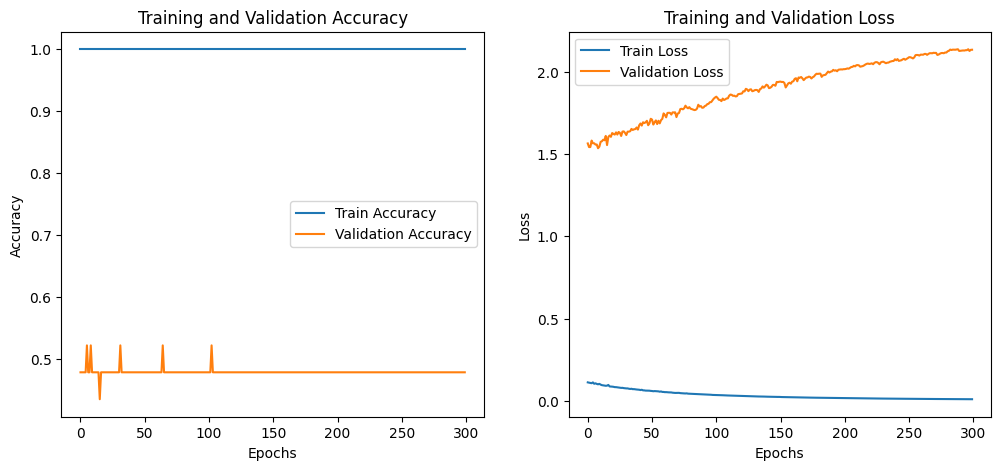

In [ ]:
## Your code to plot training and validation curves in a single plot (Make changes in the model cell to be able to do this)

# Train the model and store the training history
history = keras_model.fit(
    X_train_final, y_train_onehot,
    batch_size=20,
    epochs=300,
    validation_split=0.25,
    verbose=1
)

# Plot training & validation accuracy/loss
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


In [ ]:
# Import necessary evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generate predicted y values
prediction_column_index = keras_model.predict(X_test_final).argmax(axis=1)  # Predict class index

# Extract correct prediction labels
prediction_labels = [y_train.unique()[i] for i in prediction_column_index]  # Convert index to category

# Compute Accuracy
accuracy = accuracy_score(y_test, prediction_labels)
print(f"Neural Network Model Accuracy: {accuracy:.4f}")

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, prediction_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Compute Precision, Recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, prediction_labels))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Neural Network Model Accuracy: 0.5897
Confusion Matrix:
[[5 3 0 0 0]
 [2 4 0 0 0]
 [2 1 3 2 0]
 [0 0 2 4 2]
 [0 0 0 2 7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.50      0.67      0.57         6
           2       0.60      0.38      0.46         8
           3       0.50      0.50      0.50         8
           4       0.78      0.78      0.78         9

    accuracy                           0.59        39
   macro avg       0.59      0.59      0.58        39
weighted avg       0.60      0.59      0.59        39



Implement regularization techniques such as Dropout and Batch Normalization to improve model generalization and observe change in performance. <br>
Note: Observe the training and testing loss and accuracy.

In [ ]:
# Your code here:
from keras.layers import BatchNormalization, Dropout

# Define a Neural Network Model with Dropout & Batch Normalization
keras_model = Sequential([
    Dense(128, input_shape=(feature_count,), activation='relu'),
    BatchNormalization(),  # Batch Normalization Layer
    Dropout(0.3),  # Dropout with 30% probability

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),

    Dense(y_train_onehot.shape[1], activation='softmax')  # Output layer
])

# Compile model with Adam optimizer
keras_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train with early stopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = keras_model.fit(
    X_train_final, y_train_onehot,
    batch_size=20,
    epochs=300,
    validation_split=0.25,
    callbacks=[early_stopping]
)

# Evaluate the model
test_loss, test_accuracy = keras_model.evaluate(X_test_final, y_test_onehot)
print(f"Neural Network Test Accuracy (with Regularization): {test_accuracy:.4f}")


Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - accuracy: 0.1279 - loss: 2.3740 - val_accuracy: 0.2174 - val_loss: 1.6367
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.2795 - loss: 2.0067 - val_accuracy: 0.1739 - val_loss: 1.6323
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2414 - loss: 2.1144 - val_accuracy: 0.2174 - val_loss: 1.6234
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3106 - loss: 1.6939 - val_accuracy: 0.2174 - val_loss: 1.6101
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3517 - loss: 1.4841 - val_accuracy: 0.3043 - val_loss: 1.5986
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4264 - loss: 1.4874 - val_accuracy: 0.2609 - val_loss: 1.5878
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4856 - loss: 1.2546 - val_accuracy: 0.2609 - val_loss: 1.5733
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3915 - loss: 1.3870 - val_accuracy: 0.3043 - val_loss: 1.5570
Epo

In [ ]:
# Your comments about the change in performance

Test accuracy improved from 51.28% to 58.97%,The previous model was overfitting more, achieving high training accuracy but poor test performance.
Training accuracy remained high 91.6% but validation accuracy stagnated 47.8%,Validation loss is still high 1.2568, meaning the model struggles to generalize

SO,regularization (Dropout & Batch Normalization) helped prevent overfitting
The model learns well on training data but struggles on unseen validation data.
may be we should use early stopping to prevent over-training or adjust hyperparameters.

we can Hyperparameter Tuning or Improve Model Training Process later to increase accuracy



Experiment with different activation functions (ReLU, LeakyReLU, Tanh, Sigmoid) to observe their impact on model performance.

In [ ]:
# Your code here:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.activations import relu, tanh, sigmoid
from keras.layers import LeakyReLU
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
activations = {
    "ReLU": relu,
    "LeakyReLU": LeakyReLU(alpha=0.1),
    "Tanh": tanh,
    "Sigmoid": sigmoid
}

# Store results
history_dict = {}

# Training parameters
epochs = 100
batch_size = 20

for activation_name, activation_fn in activations.items():
    print(f"\n🔵 Training with Activation Function: {activation_name}\n")

    # Build the model
    model = Sequential([
        Dense(128, input_shape=(X_train_final.shape[1],), activation=None),
        BatchNormalization(),
        activation_fn if activation_name == "LeakyReLU" else Dense(128, activation=activation_fn),
        Dropout(0.2),

        Dense(64, activation=None),
        BatchNormalization(),
        activation_fn if activation_name == "LeakyReLU" else Dense(64, activation=activation_fn),
        Dropout(0.2),

        Dense(32, activation=None),
        BatchNormalization(),
        activation_fn if activation_name == "LeakyReLU" else Dense(32, activation=activation_fn),

        Dense(y_train_onehot.shape[1], activation='softmax')  # Output layer
    ])

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    # Train the model
    history = model.fit(
        X_train_final, y_train_onehot,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=0.2,
        verbose=1,
        callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
    )

    # Store history for later comparison
    history_dict[activation_name] = history

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test_final, y_test_onehot)
    print(f"\n🔹 {activation_name} Test Accuracy: {test_accuracy:.4f}")



🔵 Training with Activation Function: ReLU

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.2105 - loss: 1.9242 - val_accuracy: 0.3889 - val_loss: 1.5602
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4309 - loss: 1.4908 - val_accuracy: 0.3333 - val_loss: 1.5354
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5241 - loss: 1.2069 - val_accuracy: 0.3333 - val_loss: 1.5162
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6225 - loss: 0.9951 - val_accuracy: 0.4444 - val_loss: 1.4958
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5197 - loss: 1.0409 - val_accuracy: 0.3889 - val_loss: 1.4814
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7373 - loss: 0.8613 - val_accuracy: 0.3333 - val_loss: 1.4696
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7148 - loss: 0.8874 - val_accuracy: 0.5000 - val_loss: 1.4570
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6673 - lo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - accuracy: 0.1885 - loss: 2.0102 - val_accuracy: 0.2222 - val_loss: 1.6512
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3894 - loss: 1.6416 - val_accuracy: 0.2778 - val_loss: 1.6135
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4513 - loss: 1.3735 - val_accuracy: 0.2222 - val_loss: 1.5842
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5059 - loss: 1.2933 - val_accuracy: 0.2222 - val_loss: 1.5648
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4573 - loss: 1.2356 - val_accuracy: 0.1667 - val_loss: 1.5543
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5541 - loss: 1.1524 - val_accuracy: 0.1667 - val_loss: 1.5480
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4645 - loss: 1.2402 - val_accuracy: 0.1667 - val_loss: 1.5385
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5360 - loss: 1.1135 - val_accuracy: 0.1667 - val_loss: 1.5311
Epo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - accuracy: 0.3073 - loss: 1.6768 - val_accuracy: 0.2778 - val_loss: 1.4394
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4965 - loss: 1.1934 - val_accuracy: 0.2222 - val_loss: 1.3456
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6016 - loss: 0.9891 - val_accuracy: 0.2222 - val_loss: 1.2921
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6181 - loss: 0.8840 - val_accuracy: 0.2222 - val_loss: 1.2729
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6548 - loss: 0.7850 - val_accuracy: 0.2778 - val_loss: 1.2520
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7507 - loss: 0.8226 - val_accuracy: 0.3333 - val_loss: 1.2383
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7067 - loss: 0.6433 - val_accuracy: 0.3333 - val_loss: 1.2229
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6713 - loss: 0.7384 - val_accuracy: 0.3333 - val_loss: 1.2130
Epo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 194ms/step - accuracy: 0.2055 - loss: 1.6979 - val_accuracy: 0.0556 - val_loss: 1.9323
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.3308 - loss: 1.5211 - val_accuracy: 0.1111 - val_loss: 1.8927
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3642 - loss: 1.4209 - val_accuracy: 0.1667 - val_loss: 1.8516
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4153 - loss: 1.3918 - val_accuracy: 0.1667 - val_loss: 1.8093
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5218 - loss: 1.2737 - val_accuracy: 0.1667 - val_loss: 1.7704
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4759 - loss: 1.3003 - val_accuracy: 0.1667 - val_loss: 1.7340
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5914 - loss: 1.1471 - val_accuracy: 0.1667 - val_loss: 1.7018
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5012 - loss: 1.1772 - val_accuracy: 0.1667 - val_loss: 1.6689
Epo

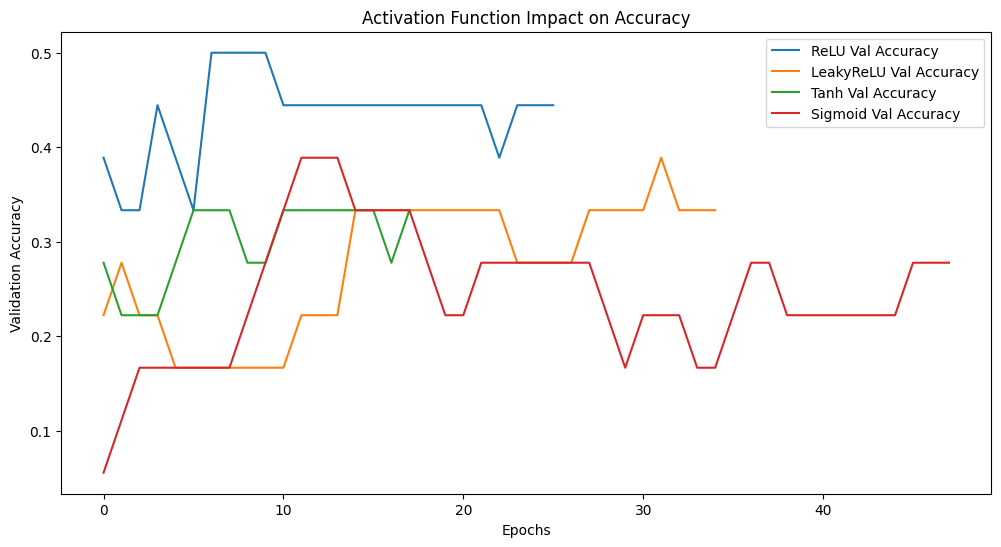

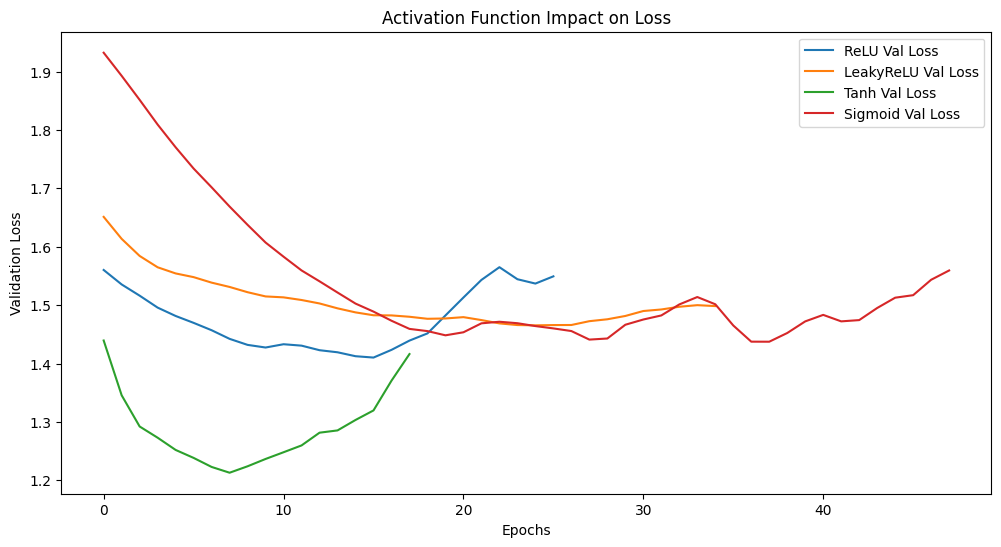

In [ ]:
# Plot training and validation accuracy for each activation function
plt.figure(figsize=(12, 6))

for activation_name, history in history_dict.items():
    plt.plot(history.history['val_accuracy'], label=f"{activation_name} Val Accuracy")

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Activation Function Impact on Accuracy")
plt.legend()
plt.show()

# Plot training and validation loss for each activation function
plt.figure(figsize=(12, 6))

for activation_name, history in history_dict.items():
    plt.plot(history.history['val_loss'], label=f"{activation_name} Val Loss")

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Activation Function Impact on Loss")
plt.legend()
plt.show()

## 8. Explainability - SHAP Feature Importance

To better understand our model's predictions, we will use **SHAP (SHapley Additive exPlanations)** to analyze feature importance.  

### 🔹 How SHAP Works?
- SHAP assigns each feature a **contribution score** for every prediction.
- Uses **Shapley values** (from game theory) to fairly distribute importance across features.

We will now apply SHAP to visualize and interpret our model’s feature contributions.


In [ ]:
print(shap_values.shape)
print(X_test_df.shape)

(39, 112, 5)
(39, 112)


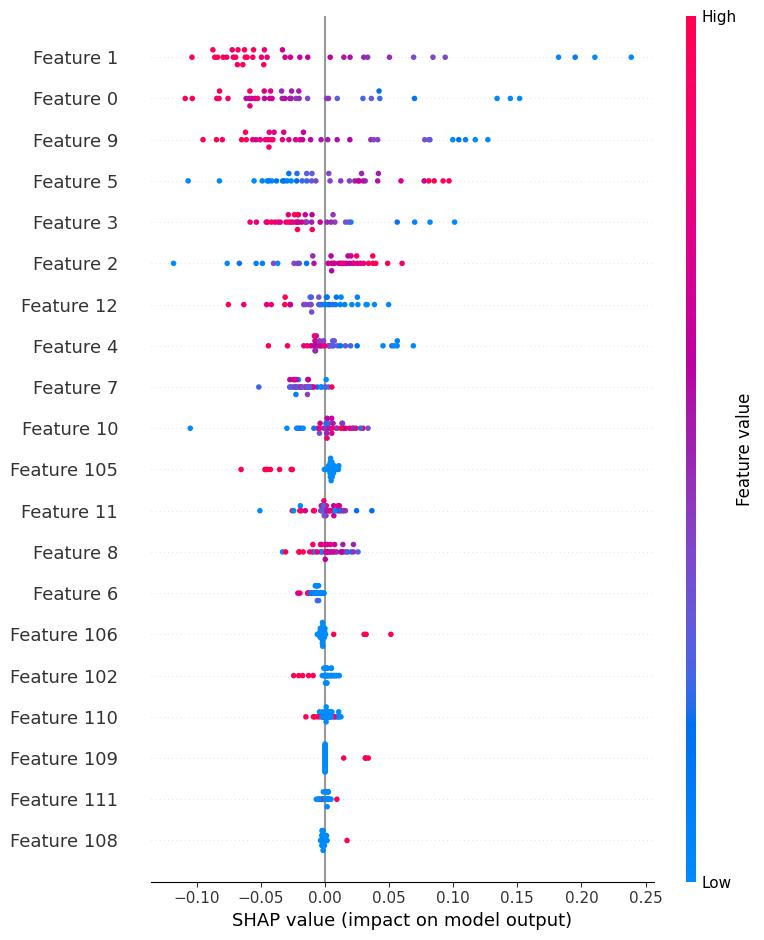

In [ ]:
# Import necessary libraries
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Convert Pandas DataFrame to NumPy array (SHAP requires NumPy input)
X_train_np = X_train_final.to_numpy()
X_test_np = X_test_final.to_numpy()

# Select a small random subset of training data as SHAP background data
background = X_train_np[np.random.choice(X_train_np.shape[0], 50, replace=False)]

# Initialize SHAP Explainer for deep learning (Keras model)
explainer = shap.Explainer(keras_model, background)

# Compute SHAP values for X_test
shap_values = explainer(X_test_np)

# Convert X_test_np back to DataFrame for SHAP plotting
X_test_df = pd.DataFrame(X_test_np, columns=X_train_final.columns)
shap_values_class0 = shap_values[:, :, 0]  # Adjust the index for other classes

# Generate SHAP summary plot
shap.summary_plot(shap_values_class0, X_test_df)


feature1 is the top

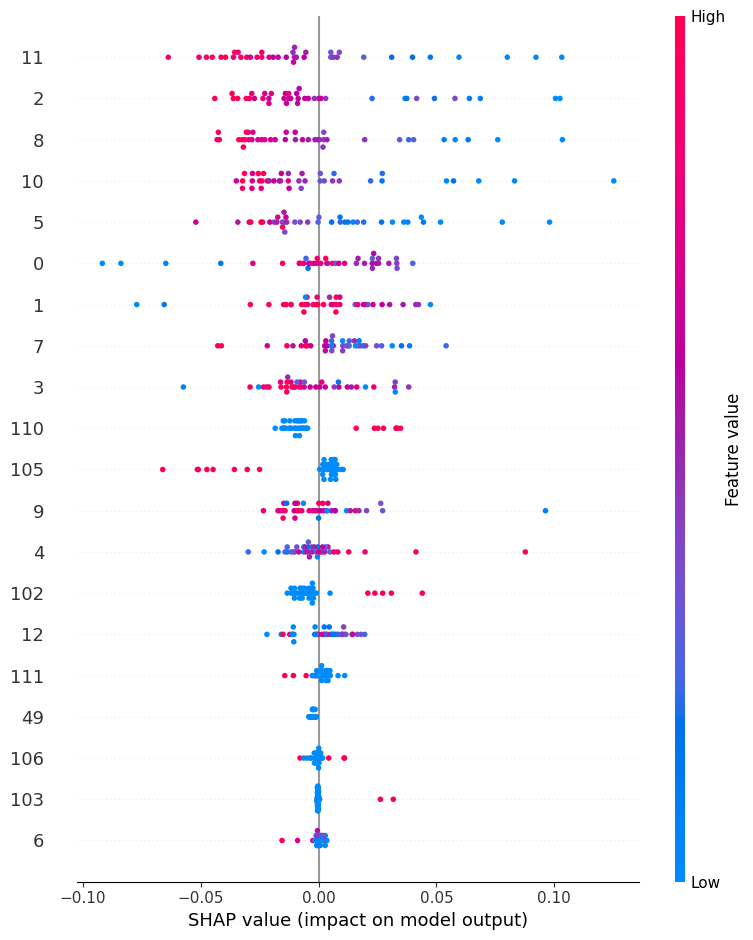

In [ ]:

shap_values = explainer(X_test_final)

class_index = 1
shap_values_class1 = shap_values[:, :, class_index]

# Convert X_test_final to a DataFrame (if not already) to retain feature names
X_test_df = pd.DataFrame(X_test_final, columns=X_train_final.columns)

# Generate SHAP summary plot
shap.summary_plot(shap_values_class1, X_test_df)


feature 11 is the top

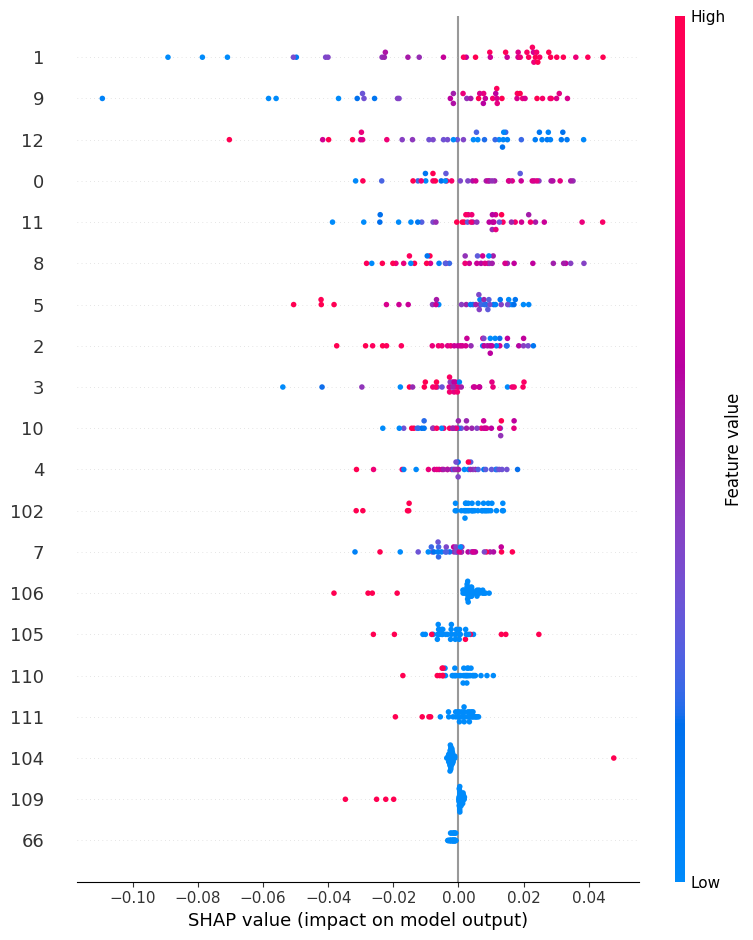

In [ ]:
class_index = 2
shap_values_class2 = shap_values[:, :, class_index]

# Convert X_test_final to a DataFrame (if not already) to retain feature names
X_test_df = pd.DataFrame(X_test_final, columns=X_train_final.columns)

# Generate SHAP summary plot
shap.summary_plot(shap_values_class2, X_test_df)

feature1 is the top

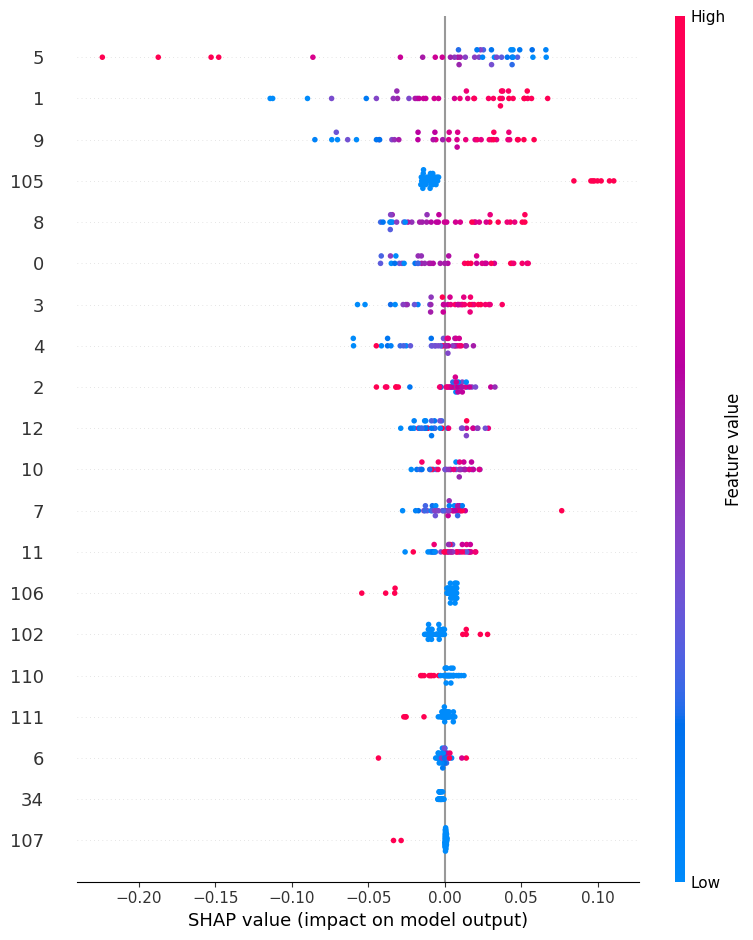

In [ ]:
class_index = 3
shap_values_class3 = shap_values[:, :, class_index]

# Convert X_test_final to a DataFrame (if not already) to retain feature names
X_test_df = pd.DataFrame(X_test_final, columns=X_train_final.columns)

# Generate SHAP summary plot
shap.summary_plot(shap_values_class3, X_test_df)

feature 5 is the top

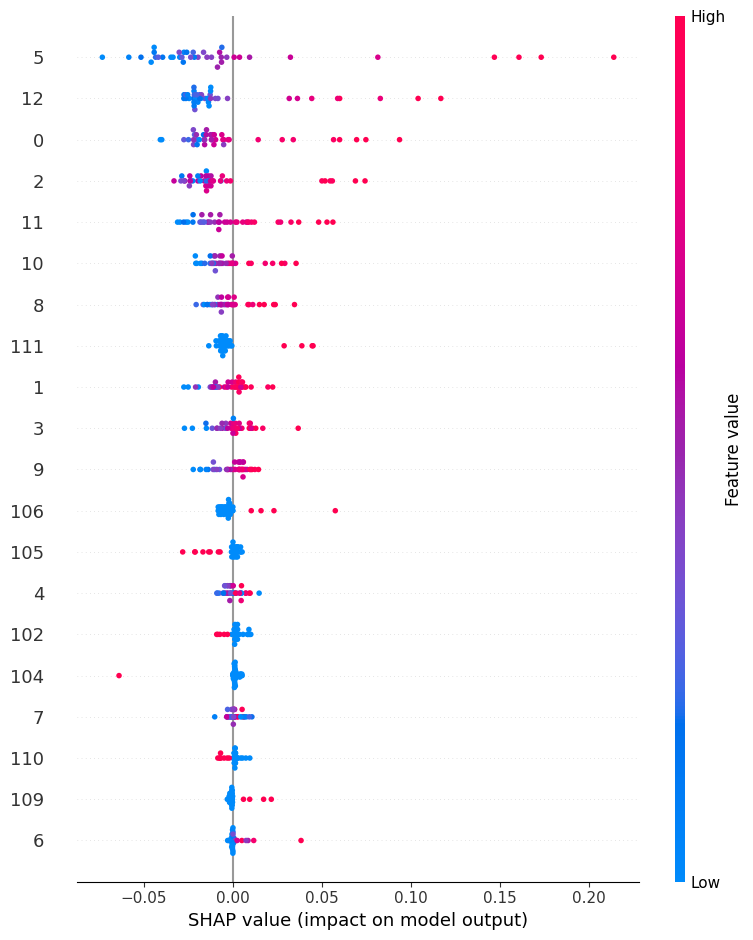

In [ ]:
class_index = 4
shap_values_class4 = shap_values[:, :, class_index]

# Convert X_test_final to a DataFrame (if not already) to retain feature names
X_test_df = pd.DataFrame(X_test_final, columns=X_train_final.columns)

# Generate SHAP summary plot
shap.summary_plot(shap_values_class4, X_test_df)

feature 5 is the top

In [ ]:
# Print unique classes from y_train
num_classes = len(y_train.unique())
print(f"🔹 The model is predicting {num_classes} classes.")


🔹 The model is predicting 5 classes.


So feature 5 and feature 1 are the dominant feature

overall,
Feature 1, Feature 0, Feature 9, Feature 5, and Feature 12 appear frequently at the top across multiple classes.
Feature 5 appears to be consistently ranked the highest in most of the plots.
Feature 9 and Feature 1 are also strong contenders but appear slightly lower in certain class plots.

In [ ]:
# Extract SHAP values as a NumPy array
shap_values_array = shap_values.values  # Converts Explanation object to array

# Check the shape of extracted values
print(f"Shape of SHAP values array: {shap_values_array.shape}")
# Compute mean absolute SHAP values across all classes
shap_values_mean = np.mean(np.abs(shap_values_array), axis=2)  # Shape: (samples, features)

# Verify the new shape
print(f"Shape of shap_values_mean: {shap_values_mean.shape}")



Shape of SHAP values array: (39, 112, 5)
Shape of shap_values_mean: (39, 112)


In [ ]:
print("SHAP Values Shape:", shap_values.shape)  # Check the original SHAP values
print("SHAP Values for Class 1 Shape:", shap_values_class1.shape)  # Check the extracted class


SHAP Values Shape: (39, 112, 5)
SHAP Values for Class 1 Shape: (39, 112)


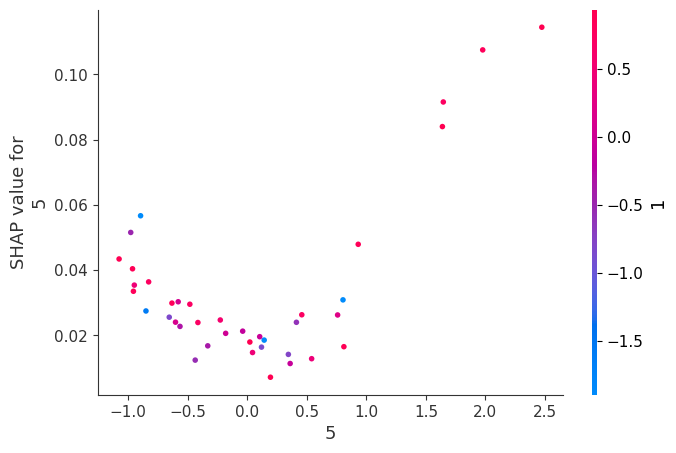

<h3> Experimentation

In [ ]:
## You are encouraged to try more experimentation and any other models by adding more code cells to this notebook:

## You can also try to import any new dataset pertaining to countries, merge it, and see if it helps the predictions.
## If it does not, try to explain why it wasn't helpful by exploring variable relationships.

Deep learning models are often considered 'black boxes' due to their complexity. Explore methods such as SHAP (SHapley Additive exPlanations) to explain your model's predictions. After applying one of these methods, do you feel it provides a clear and sufficient explanation of how your model makes decisions? How easy or difficult is it to justify your model's predictions using these techniques?

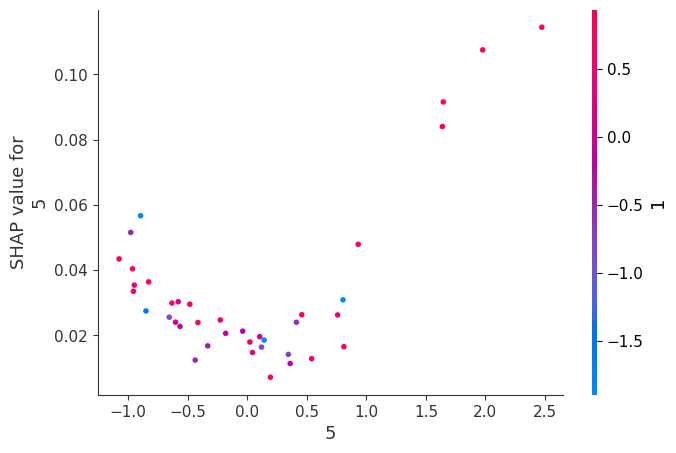

In [ ]:
## Your Code and Answer:
shap.dependence_plot(top_feature, shap_values_mean, X_test_df)#visualize how the top feature influences predictions

In [ ]:
# Extract SHAP values as a NumPy array
shap_values_array = shap_values.values

# Compute the mean absolute SHAP value for each feature
shap_values_mean = np.mean(np.abs(shap_values_array), axis=2)  # Average across all classes

# Identify the most important feature
top_feature_index = np.argmax(np.mean(shap_values_mean, axis=0))
top_feature = X_test_df.columns[top_feature_index]

print(f"🔹 The Most Important Feature Across All Classes: {top_feature}")


🔹 The Most Important Feature Across All Classes: 5


First, it provides feature importance rankings. SHAP helps identify which features are most influential.  

Second, per-class analysis allows us to see how different features affect different classes.  

Finally, individual prediction force plots explain why a specific decision was made.  

However, SHAP is slow for deep learning models, and feature interactions are tricky.

## 9. Submission of final report and clean code to github

[This is a final project you display on your GitHub to the World]

**Instructions**
- Make a new notebook, visualize any plots you found relevant
- Reproduce the code you used for the best models and display results
- Write what insights you found useful and what behaviours were observed
- Make it in a style of a clean, succint report (within the .ipynb)
- Upload this final report notebook to a new repository in your personal github account
- Remember to paste the link of your final repo at the top of this notebook where asked